---
title: PA 6.1
author: Sujanya Srinath
format:
    html:
        toc: true
        code-fold: true
theme: morph
embed-resources: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

Ans: We would have to dummify the categorical variables species, island, sex

In [61]:
# Code Here
#!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()


In [62]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_line, ggtitle, xlab, ylab, theme_minimal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
penguins.dropna(inplace=True)

In [64]:
cat_vars = ['species', 'island', 'sex']
penguins_dummified = pd.get_dummies(penguins, columns=cat_vars, drop_first=True)


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [65]:
# Code Here
y = penguins_dummified['bill_depth_mm']
X = penguins_dummified[['bill_length_mm']]

In [66]:
degrees = [1, 2, 3, 10]
penguins_plot = pd.DataFrame({'bill_length_mm': X['bill_length_mm'], 'bill_depth_mm': y})

In [67]:
#asked chatgpt for syntax for fitting the different degree models
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    penguins_plot[f'pred_degree_{degree}'] = model.predict(X_poly)



In [68]:
#making it long to make it easier to plot
penguins_plot_long = pd.melt(
    penguins_plot,
    id_vars=['bill_length_mm', 'bill_depth_mm'],
    value_vars=[f'pred_degree_{deg}' for deg in degrees],
    var_name='Degree',
    value_name='Predicted Bill Depth'
)


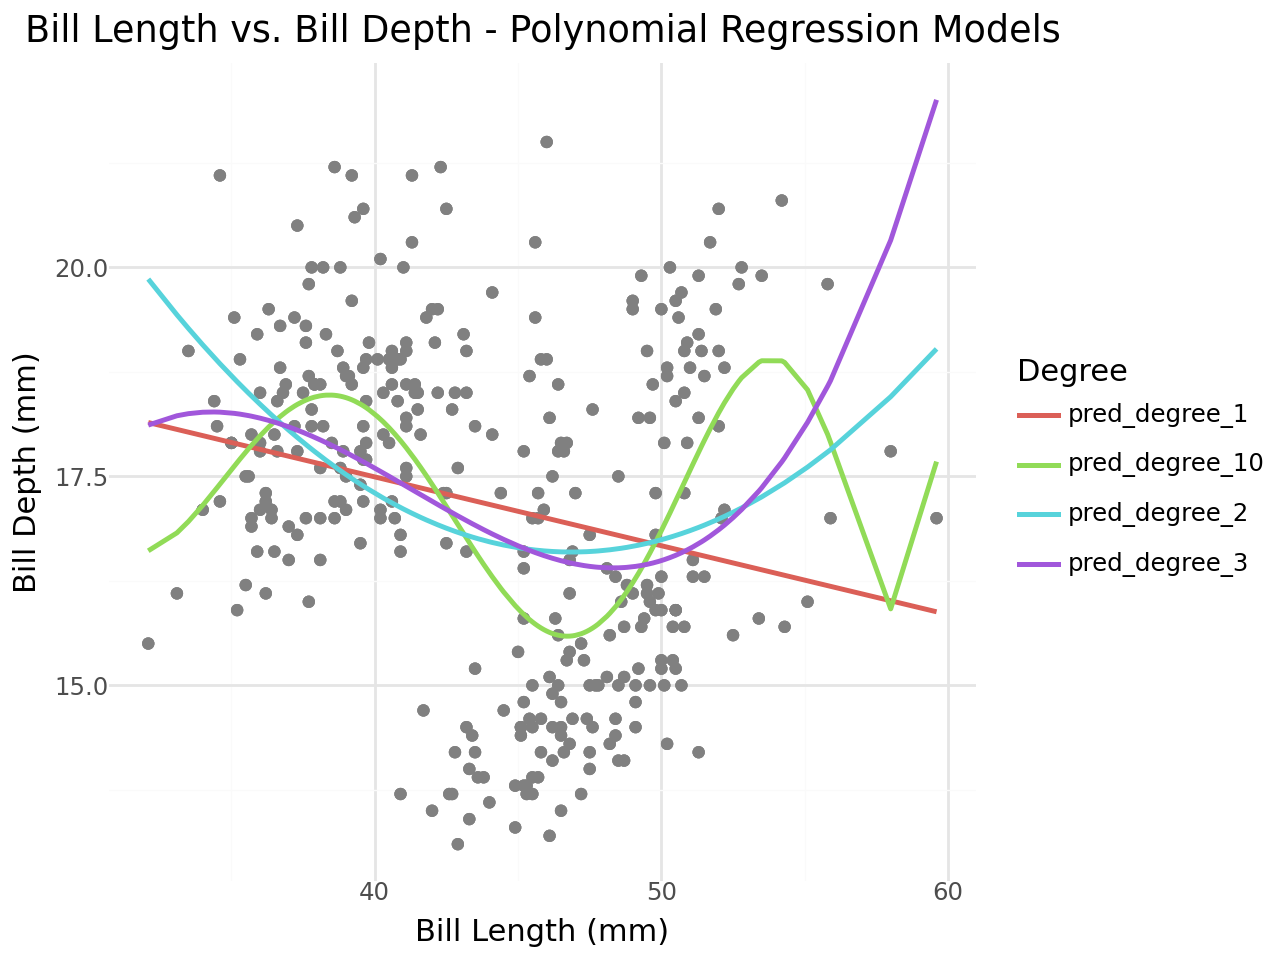

In [70]:
(
    ggplot(penguins_plot_long, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='gray', size=1.5, alpha=0.7) +
    geom_line(aes(y='Predicted Bill Depth', color='Degree'), size=1) +
    ggtitle('Bill Length vs. Bill Depth - Polynomial Regression Models') +
    xlab('Bill Length (mm)') +
    ylab('Bill Depth (mm)') +
    theme_minimal()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Are any of the models above underfitting the data? If so, which ones and how can you tell?


*   Yes, the linear model is underfitting the data. The data is underfitted by this model. It shows a linear relationship that doesnt account for the data's pattern. There also seems like there would be a lot of residuals while fitting the model


Are any of thhe models above overfitting the data? If so, which ones and how can you tell?


*   Model of the 10th degree is ovefitting the model. It is trying to capture every single point in the pattern and that would not leave any room for predicting other data


Which of the above models do you think fits the data best and why?


*   Models of degree 2 and 3 look like they fit the model best. They look like they would capture a general prediction well. They do not go through all the points but also look like they have the least residuals

